# Random Walk
A special type of time series, where values tend to persist over tive and the differences between periods are simply white noise.
$$P_t=P_{t-1} + \epsilon_t$$
$$\epsilon_t = WhiteNoise(\mu, \sigma^2)$$
Where $\epsilon_t$ is residuals

In [1]:
import os
import pandas as pd
import numpy as np
DATA_DIR = '../data'

In [3]:
rw = pd.read_csv(os.path.join(DATA_DIR, "RandWalk.csv"))
rw.date = pd.to_datetime(rw.date, dayfirst=True)
rw.set_index("date", inplace=True)
rw = rw.asfreq('b')
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-10,1080.347860
1994-01-11,1082.095245
1994-01-12,1083.639265
1994-01-13,1067.146255


In [4]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [5]:
raw_csv_data = pd.read_csv(os.path.join(DATA_DIR, "Index2018.csv"))
df_comp  = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index('date', inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')
df_comp['market_value'] = df_comp.spx
del df_comp['spx'], df_comp['dax'], df_comp['nikkei'], df_comp['ftse']
size = int(len(df_comp)*0.8)
df = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]
wn = np.random.normal(loc=df.market_value.mean(), scale=df.market_value.std(), size=len(df))
df['wn'] = wn

<ipython-input-5-40dd2a2d8526>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [6]:
df['rw'] = rw.price
df.head()

<ipython-input-6-e3d6c4b57795>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rw'] = rw.price


,market_value,wn,rw
date,,,
1994-01-07,469.90,678.021292,1122.139662
1994-01-10,475.27,1001.625321,1080.347860
1994-01-11,474.13,538.324871,1082.095245
1994-01-12,474.17,1098.627798,1083.639265
1994-01-13,472.47,1086.047013,1067.146255


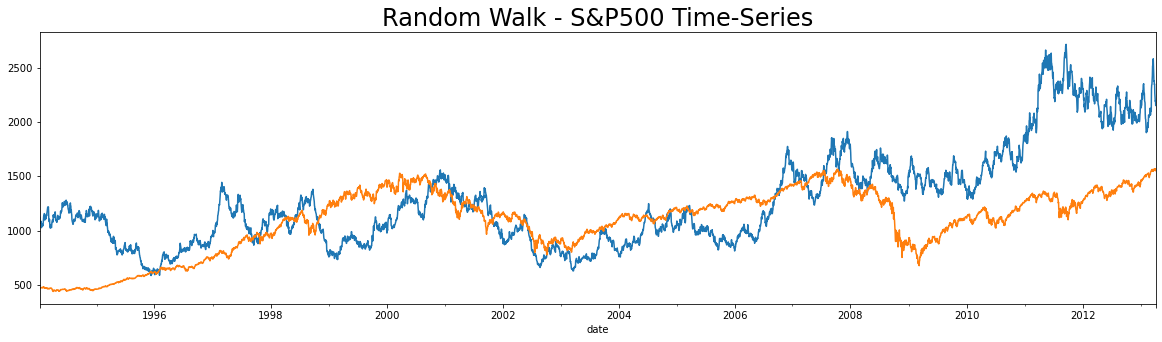

In [9]:
import matplotlib.pyplot as plt

df.rw.plot(figsize=(20, 5))
df.market_value.plot()
#df.market_value.plot()
plt.title("Random Walk - S&P500 Time-Series", size=24)
plt.show()

## Market Efficiency
Measures the level of difficulty in forecasting correct future values

## Arbitrage
Buy and sell commodities and make a safe profit, while the price adjusts

# Stationarity
![alt_text](stationarity.png)

## Covariance Stationarity
- Constant Mean $\mu$
- Constant Variance $\sigma^2$
- $Cov(x_n, x_{n+k}) = Cov(x_m, x_{m+k})$
- Covariance is nothing but multiplication of Correlation and Standard Deviations
- ie $Cov(x_n, x_{n+k}) = Corr(x_m, x_{m+k})\sigma_1\sigma_2$

## Strict Stationarity
- $(x_t, x_{t+k}) = Dist(\mu, \sigma^2)$
- $(x_{t+\tau}, x_{t+\tau+k}) = Dist(\mu, \sigma^2)$